In [10]:
import cv2 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
import os

In [11]:
!sudo pip install --upgrade youtube_dl

Requirement already up-to-date: youtube_dl in /usr/local/lib/python3.6/dist-packages (2020.11.1.1)


In [12]:
!pip install face_alignment

In [13]:
!mkdir data
!mkdir data/videos
!mkdir data/cropped_frames
!mkdir output
!mkdir models

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/videos’: File exists
mkdir: cannot create directory ‘data/cropped_frames’: File exists
mkdir: cannot create directory ‘output’: File exists
mkdir: cannot create directory ‘models’: File exists


In [17]:
!youtube-dl -f 134 -o data/videos/elon.mp4 https://www.youtube.com/watch?v=gp7oGkWKkig&ab_channel=iGadgetPro
!youtube-dl -f 134 -o data/videos/obama.mp4 https://www.youtube.com/watch?v=bps3m4eFTuE&ab_channel=NBCNews 

[youtube] gp7oGkWKkig: Downloading webpage
[download] data/videos/elon.mp4 has already been downloaded
[download] 100% of 6.67MiB
[youtube] bps3m4eFTuE: Downloading webpage
[download] data/videos/obama.mp4 has already been downloaded
[download] 100% of 9.90MiB


In [18]:
!rm -rf deepfakes
!git clone https://github.com/Mayukhdeb/deepfakes.git

Cloning into 'deepfakes'...
remote: Enumerating objects: 356, done.
remote: Counting objects: 100% (356/356), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 356 (delta 167), reused 265 (delta 92), pack-reused 0
Receiving objects: 100% (356/356), 2.41 MiB | 31.61 MiB/s, done.
Resolving deltas: 100% (167/167), done.


In [ ]:
!rm -rf data/cropped_frames
!mkdir data/cropped_frames 
!python deepfakes/generate_training_data.py

In [ ]:
!zip -r data.zip data

In [23]:
## saving data to drive 
# !cp data.zip /content/drive/"My Drive"/deepfakes

## for importing data from drive
# !cp  /content/drive/"My Drive"/deepfakes/data.zip /content/
# !unzip data.zip


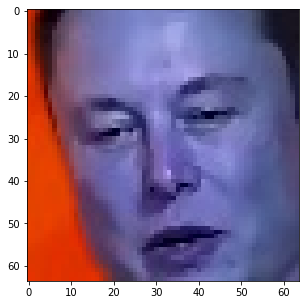

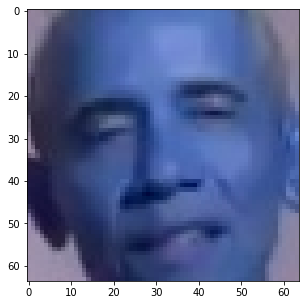

In [40]:
plt.rcParams["figure.figsize"] = (5,5)

plt.imshow(cv2.imread("/content/data/cropped_frames/elon/0.jpg"))
plt.show()
plt.imshow(cv2.imread("/content/data/cropped_frames/obama/0.jpg"))

## used old crop_video_frames with obama pad 12 

In [ ]:
len(os.listdir("/content/data/cropped_frames/elon")), len(os.listdir("/content/data/cropped_frames/obama"))

(10738, 11540)

In [ ]:
!cp  /content/drive/"My Drive"/deepfakes/models/model.pth models

In [35]:
!python deepfakes/train.py

7736  images found in  data/cropped_frames/elon
8693  images found in  data/cropped_frames/obama
deepcake trainer initiated on device: cuda
loading checkpoint:  models/model.pth
100% 2000/2000 [09:22<00:00,  3.55it/s]
lossA:0.03069702908396721, lossB:0.029345985502004623
saved:  models/model.pth


In [36]:
!python deepfakes/inference.py

<Figure size 700x300 with 1 Axes>


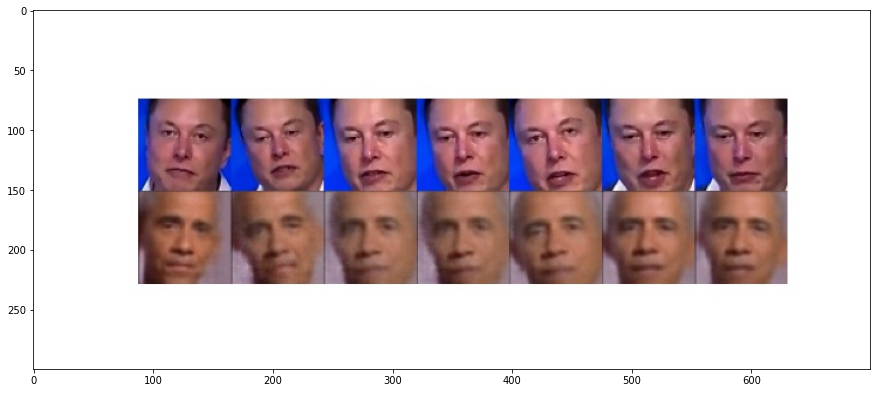

In [37]:
im = cv2.cvtColor(cv2.imread("output/preds.jpg"), cv2.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = 15, 10
plt.imshow(im)
plt.show()

In [41]:
!cp models/model.pth /content/drive/"My Drive"/deepfakes/models